![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)


**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 2: Filtros media movil / filtro gaussiano
```

###**2.1. Importación de Librerías y creación de la señal de prueba**

* **Librerias a utilizar:**



In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')


* **Creacion de una señal con ruido**

In [3]:
fm=11250 #frecuencia de muestreo
t=np.arange(0,3,1/fm)  #variable independiente discreta
dimension_t=len(t)
print(dimension_t)

p=20
amplitud_ruido=10

senial=np.interp(np.linspace(0,20,dimension_t),np.arange(0,20),np.random.rand(p)*30)
ruido=amplitud_ruido*np.random.rand(dimension_t)

senial_ruidosa=senial+ruido

33750


* **Mostrando señales generadas:**

Text(0, 0.5, 'Amplitud')

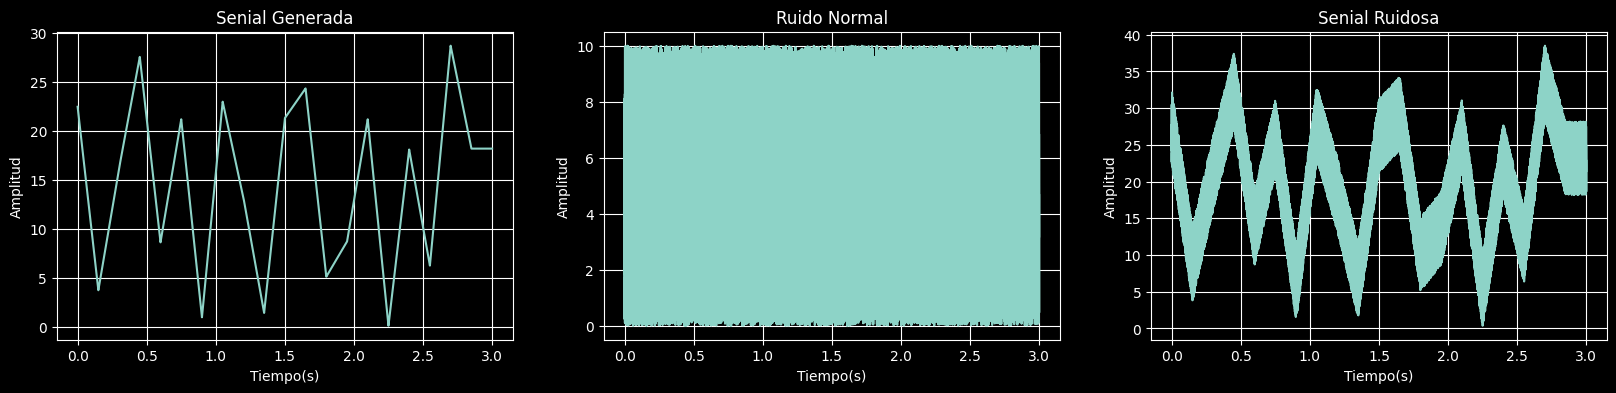

In [4]:
plt.subplots(1,3,figsize=(20,4))

plt.subplot(131)
plt.plot(t, senial)
plt.grid(True)
plt.title('Senial Generada')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')

plt.subplot(132)
plt.plot(t,ruido)
plt.grid(True)
plt.title('Ruido Normal')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')


plt.subplot(133)
plt.plot(t,senial_ruidosa)
plt.grid(True)
plt.title('Senial Ruidosa')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')





### **2.2. Filtro media movil**

* **Estructura del filtro:**

![promedio movil.png](https://i.ibb.co/qgv7gP5/promedio-movil.png=100x20)

* **Mas referencias teóricas: **
1. [Media Movil](https://es.wikipedia.org/wiki/Media_m%C3%B3vil)
2. Consultar el libro [2] de la bibliografia del curso en la pagina 38.



* **Aplicación del filtro media movil:**

14.311111111111112


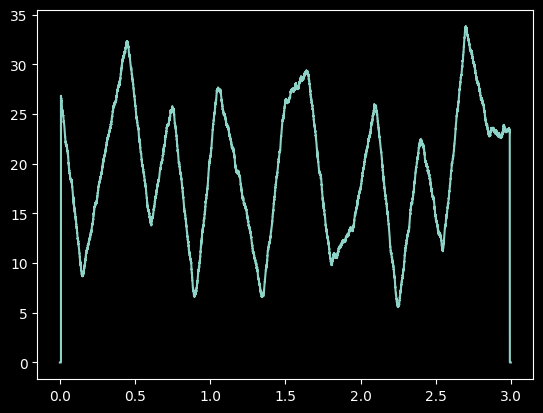

In [5]:
k=80
senial_filtrada=np.zeros_like(senial_ruidosa)

for i in range(k,dimension_t-k+1):
  senial_filtrada[i]= np.mean(senial_ruidosa[i-k:i+k])

tamanio_ventana=1000*((2*k+1)/fm)  #tamanio del filtro en milisegundos
print(tamanio_ventana)
plt.plot(t,senial_filtrada)

* **Gráficas de los resutados:**

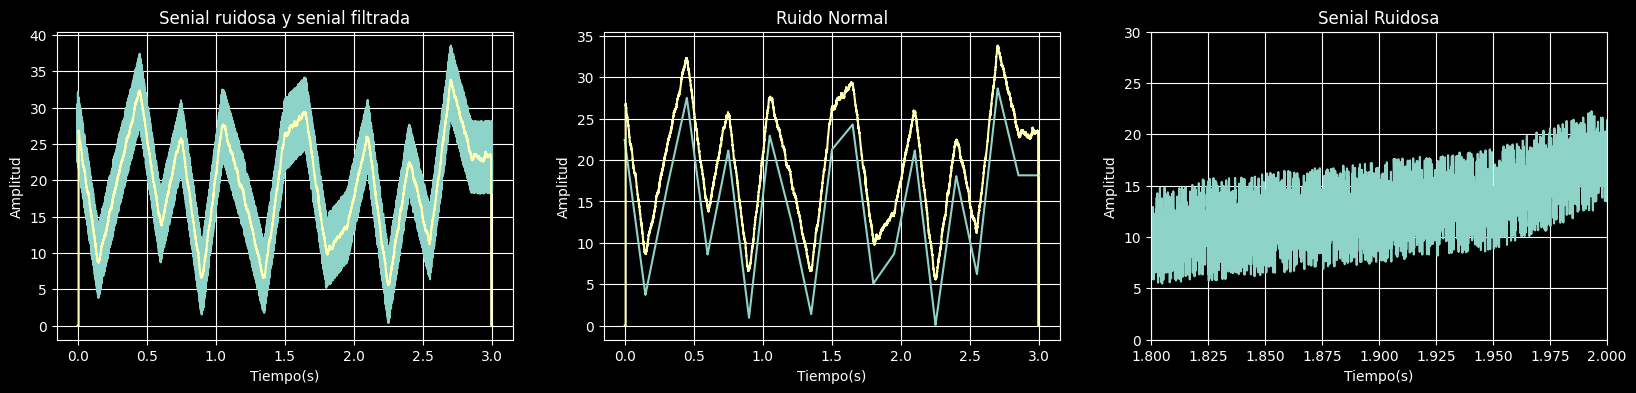

In [6]:
plt.subplots(1,3,figsize=(20,4))

plt.subplot(131)
plt.plot(t, senial_ruidosa)
plt.plot(t, senial_filtrada)
plt.grid(True)
plt.title('Senial ruidosa y senial filtrada')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')

plt.subplot(132)
plt.plot(t, senial)
plt.plot(t, senial_filtrada)
plt.grid(True)
plt.title('Ruido Normal')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')


plt.subplot(133)
plt.plot(t,senial_ruidosa)
plt.grid(True)
plt.title('Senial Ruidosa')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.axis([1.8,2,0,30])
plt.show()




### **2.3. Filtro Gaussiano**

* **Ecuacion para creacion del filtro:**

![Ecuacion Gaussiana](https://i.ibb.co/QCJZ27n/gauss-filter.png)


* **Referencias teoricas:**
1. [Filtro Gaussiano](https://en.wikipedia.org/wiki/Gaussian_filter)

2. [FWHM](https://https://en.wikipedia.org/wiki/Full_width_at_half_maximum#:~:text=In%20a%20distribution%2C%20full%20width,half%20of%20its%20maximum%20value.&text=If%20the%20FWHM%20of%20a,be%20integrated%20by%20simple%20multiplication.)

* **Creación del filtro gaussiano:**

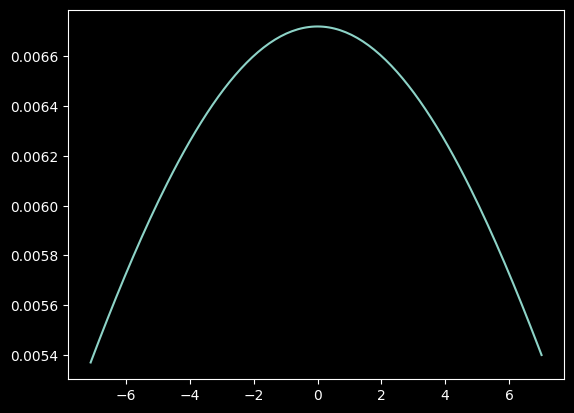

In [7]:
FWHM=25
k=80
gauss_t=1000*np.arange(-k,k)/fm
filtro_gaussiano=np.exp(-4*(np.log(2)*gauss_t**2)/FWHM**2)
filtro_gaussiano_normalizado = filtro_gaussiano/np.sum(filtro_gaussiano)
plt.plot(gauss_t,filtro_gaussiano_normalizado)



* **Mostrando el filtro gaussiano construido:**

* **Aplicación del filtro Gaussiano:**

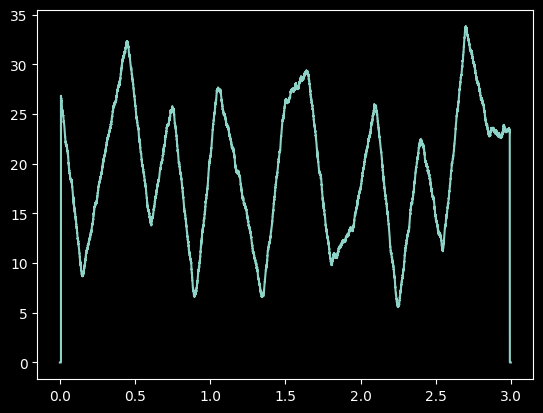

In [8]:
senial_filtrada_gauss = np.zeros_like(senial_ruidosa)

for i in range(k,dimension_t-k+1):
  senial_filtrada_gauss[i]= np.sum(senial_ruidosa[i-k:k+i]*filtro_gaussiano_normalizado)


plt.plot(t, senial_filtrada)

* **Mostrando los resultados:**

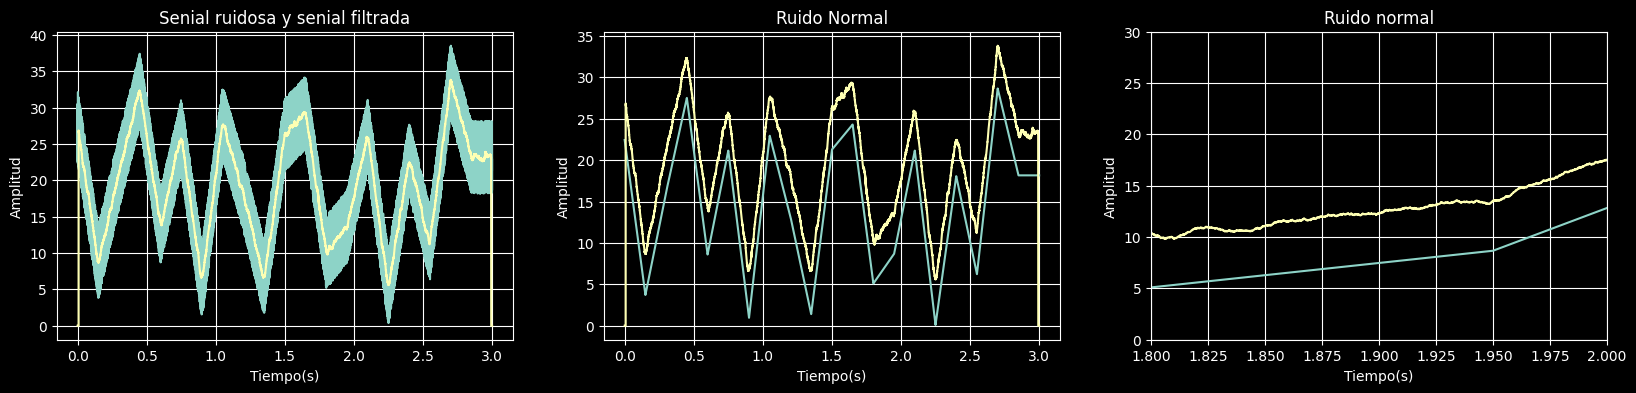

In [9]:
plt.subplots(1,3,figsize=(20,4))

plt.subplot(131)
plt.plot(t, senial_ruidosa)
plt.plot(t, senial_filtrada_gauss)
plt.grid(True)
plt.title('Senial ruidosa y senial filtrada')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')

plt.subplot(132)
plt.plot(t, senial)
plt.plot(t, senial_filtrada_gauss)
plt.grid(True)
plt.title('Ruido Normal')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')


plt.subplot(133)
plt.plot(t, senial)
plt.plot(t,senial_filtrada_gauss)
plt.grid(True)
plt.title('Ruido normal')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.axis([1.8,2,0,30])
plt.show()

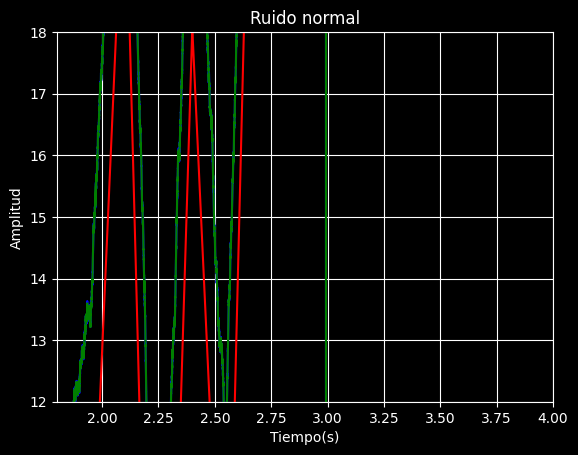

In [13]:
plt.plot(t, senial,'r')
plt.plot(t, senial_filtrada,'b')
plt.plot(t, senial_filtrada_gauss,'g')
plt.grid(True)
plt.title('Ruido normal')
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.axis([1.8, 4, 12, 18])
plt.show()

###**2.4.Comparacion de filtros**

1. **¿Cuál es la diferencia entre una señal estocástica de una señal determinística? **
Una señal determinística es una señal en la cual cada valor esta fijo y puede ser determinado por una expresión matemática, regla, o tabla, en lo cual los valores futuros de esta señal pueden ser calculados usando sus valores anteriores teniendo una confianza completa en los resultados. Mientas la señal  estocástica es un concepto matemático que sirve para representar magnitudes aleatorias que varían con el tiempo o para caracterizar una sucesión de variables aleatorias que evolucionan en función de otra variable, generalmente el tiempo. Cada una de las variables aleatorias del proceso tiene su propia función de distribución de probabilidad y pueden o no estar correlacionadas entre sí.
2. **¿Qué es la tasa de muestreo de la señal?**
El muestreo de una señal de tiempo continua produce una señal de tiempo discreta al seleccionar los valores de la señal de tiempo continua en puntos espaciados uniformemente en el tiempo. Así, el muestreo de una señal de tiempo continua x con periodo de muestreo Ts da la señal de tiempo discreta xs definida por xs(n)=x(nTs). La frecuencia angular de muestreo es dada entonces por ωs=2π/Ts.
3. **¿El filtro media móvil implementado es causal?**
 Cuando hay una interferendia de una señal ruidosa, lo mas lógico es aplicar un filtro de media móvil. Debido a que el ruido generalmente es gaussiano y se quiere estimar el "valor medio" de la señal. Pero desde el punto de vista frecuencial no es la mejor opción. Aquí nos centraremos en un caso genérico, que es el más típico: tenemos una señal de banda limitada con un ruido gaussiano o de alta frecuencia, algo así como el de la imagen de portada. El objetivo entonces es filtrar el ruido de alta frecuencia con un filtro pasa-bajos.

**Integrantes:**
-Lojas Raferti
-Ramirez Vargas Julio Christian
-Dickson Rosales Cano

Test de Comprobacion


---


